# Capstone Project two: Feature Engineering

In step 2 of this project , we visaulized the raw and cleaned data and also carried out PCA analysis to discover following.

* Outliers and errors were the reason behind poor correlation between some of the features.
* Removing those ouliers and errors showed very strong correlation among the features.
* Further, the PCA analysis showed the data is basically a one dimensional.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [5]:
RUL_cleaned = pd.read_csv("RUL_cleaned.csv").drop(["Cycle_Index"], axis=1)

In [6]:
RUL_cleaned.head()

,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,2595.30,1151.488500,3.670,3.211,5460.001000,6755.01,10777.82,1112
1,3301.18,1194.235077,3.674,3.504,5023.633636,5977.38,5977.38,1106
2,3228.58,1135.349333,3.689,3.485,5033.075692,5969.89,5969.89,1101
3,2261.34,883.200000,4.038,3.901,1949.664000,2922.69,6070.11,1096
4,2259.46,883.199000,4.042,3.373,5181.377000,6161.38,9310.98,1095


## Data types and Dummy Features:

In [8]:
RUL_cleaned.dtypes

Discharge Time (s)           float64
Decrement 3.6-3.4V (s)       float64
Max. Voltage Dischar. (V)    float64
Min. Voltage Charg. (V)      float64
Time at 4.15V (s)            float64
Time constant current (s)    float64
Charging time (s)            float64
RUL                            int64
dtype: object

**Since, all the data in this project are of numerical nature, we do not require create any dummy features.**

## Feature:Target Separation

In [11]:
X = RUL_cleaned.drop(["RUL"], axis=1)
y = RUL_cleaned["RUL"]

## Feature Importance:

As most of the features are highly correlated with each other it would be best to identify which of them are most important in predicting the target variable. `L1 Regularization (Lasso)` is best for both interpretability and handling multicollinearity for non categorical data.\
We will first perform Standardization of features as it is essential to ensure accurate and comparable coefficient values, leading to more reliable feature selection and interpretation.

In [14]:
X_standardized = StandardScaler().fit_transform(X)
L_reg = Lasso(alpha=0.01, random_state=123) 
L_reg.fit(X_standardized, y)

coefficients = L_reg.coef_
feature_names = X.columns

lasso_coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient',ascending=False).reset_index(drop=True)

print("Selected Features and Their Coefficients:")
lasso_coef_df 

Selected Features and Their Coefficients:


,Feature,Coefficient
0,Discharge Time (s),192.061127
1,Time at 4.15V (s),69.757715
2,Max. Voltage Dischar. (V),58.430585
3,Charging time (s),13.484774
4,Time constant current (s),9.179064
5,Min. Voltage Charg. (V),7.622740
6,Decrement 3.6-3.4V (s),-14.926404


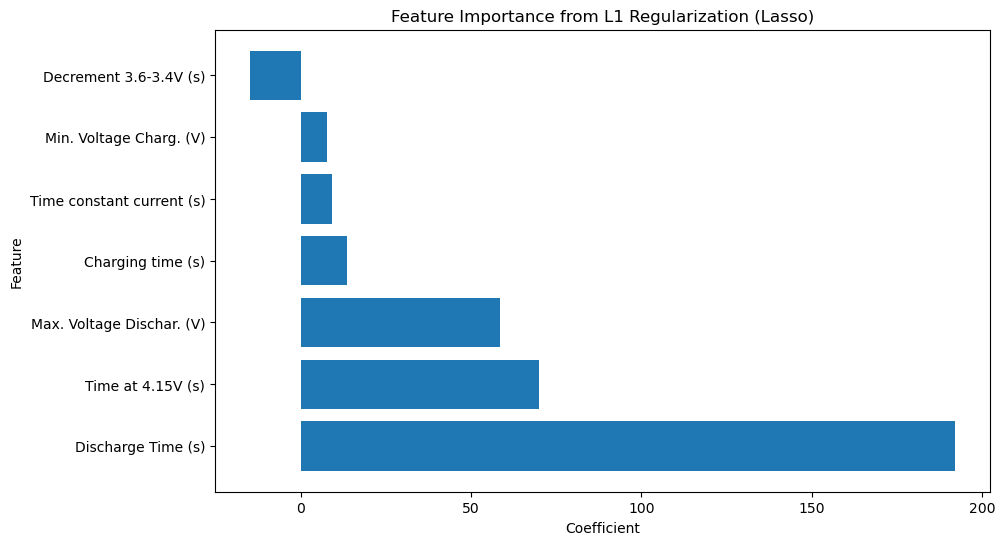

In [15]:
plt.figure(figsize=(10, 6))
plt.barh(lasso_coef_df['Feature'], lasso_coef_df['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance from L1 Regularization (Lasso)')
plt.show()

Using `L1 Regularization (Lasso)` to perform feature selection on the dataset, we identified the most important features and their coefficients. The output revealed that `Discharge Time (s)`, `Time at 4.15V (s)`, and `Max. Voltage Dischar. (V)` are the most influential positive features, while `Decrement 3.6-3.4V (s)` has a negative impact. The feature importance was visualized with a bar plot, providing a clear representation of each feature's contribution to the model.

Although, one might jump ahead and delete all the features with small importance but we need to keep in mind that these feature importances are with respect to Lasso Model. It might not be the same case for some other models. For this reason, we will keep these features for now. However, this will give some sort of idea while trying multiple models later in the project and comparing between them.  

## Train Test Split:

Here, we will go back and use the unstandardized data before test train split. Otherwise, there will be a chance of data leakage.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

## Standardization of features

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)